# (Ford bay wheel dataset Exploration)
## by (Maha Ezzat)

## Preliminary Wrangling

> This document explores a dataset containing trips duration and attributes for approximately 4 million ride.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import datetime

%matplotlib inline

In [ ]:
#Concatinate 2019 in one csv file

"""
data_list = []

path = r'C:\Users\Mah\Desktop\Data analyst ND\Project Template\files\2019' # use your path
all_files = glob.glob(path + "/*.csv")


for file in all_files:
    data_list.append(pd.read_csv(file ))
    
df = pd.concat(data_list)
df.to_csv('baywheels_2019.csv')


data_list = []

path = r'C:\Users\Mah\Desktop\Data analyst ND\Project Template\files\2020' # use your path
all_files = glob.glob(path + "/*.csv")


for file in all_files:
    data_list.append(pd.read_csv(file ))
    
df = pd.concat(data_list)
df.to_csv('baywheels_2020.csv')

"""



In [ ]:
"""
#Helper function 

def fun(index_list, col1, col2, uniq1, uniq2):
    
    return_arr = df_2020.as_matrix(columns=[col1])
    temp_arr = df_2020.as_matrix(columns=[col2])
    
    for ind in index_list:
        if temp_arr[ind] == uniq2[0]: 
            return_arr[ind] =  uniq1[0]
            
        elif temp_arr[ind] == uniq2[1]: 
            return_arr[ind] =  uniq1[0]
            
    return return_arr
"""

In [ ]:
"""
df_2019 = pd.read_csv('baywheels_2019.csv')

df_2019['end_lat'] = df_2019['end_station_latitude']
df_2019['start_lat'] = df_2019['start_station_latitude']
df_2019['end_lng'] = df_2019['end_station_longitude']
df_2019['start_lng'] = df_2019['start_station_longitude']
df_2019['ended_at'] = df_2019['end_time']
df_2019['started_at'] = df_2019['start_time']

df_2019.drop(columns=['end_station_latitude'], inplace=True)
df_2019.drop(columns=['start_station_latitude'], inplace=True)
df_2019.drop(columns=['end_station_longitude'], inplace=True)
df_2019.drop(columns=['start_station_longitude'], inplace=True)
df_2019.drop(columns=['end_time'], inplace=True)
df_2019.drop(columns=['start_time'], inplace=True)

df_2019['started_at'] = df_2019['started_at'].apply(lambda x: x.split(".")[0])
df_2019['ended_at'] = df_2019['ended_at'].apply(lambda x: x.split(".")[0])


df_2019['started_at'] = pd.to_datetime(df_2019['started_at'], format="%Y-%m-%d %H:%M:%S")
df_2019['ended_at'] = pd.to_datetime(df_2019['ended_at'], format="%Y-%m-%d %H:%M:%S")
df_2019.info()

"""

In [ ]:
"""

df_2020 = pd.read_csv('baywheels_2020.csv')

df_2020_temp = pd.DataFrame(data={'started_at': ["16/08/2013 09:51:43"]*len(df_2020), 'ended_at': ["16/08/2013 09:51:43"]*len(df_2020)})
df_2020_temp['started_at'] = pd.DataFrame(pd.to_datetime(df_2020_temp['started_at'], format = "%d/%m/%Y %H:%M:%S"))
df_2020_temp['ended_at'] = pd.DataFrame(pd.to_datetime(df_2020_temp['ended_at'], format = "%d/%m/%Y %H:%M:%S"))

ind_started_without_day_1 = [i for i, s in enumerate(df_2020['started_at']) if len(s.split('/')) == 2]
ind_ended_without_day_1 = [i for i, s in enumerate(df_2020['ended_at']) if len(s.split('/')) == 2]

df_2020.iloc[ind_started_without_day_1, -2] = df_2020.iloc[ind_started_without_day_1, -2].apply(lambda x: x.replace("/", "/00/"))
df_2020.iloc[ind_ended_without_day_1, 7] = df_2020.iloc[ind_ended_without_day_1, -2].apply(lambda x: x.replace("/", "/00/"))

ind_started_without_day = [i for i, s in enumerate(df_2020['started_at']) if ("/00/" in s)]
ind_ended_without_day = [i for i, s in enumerate(df_2020['ended_at']) if ("/00/" in s)]
ind_started_with_day = [i for i, s in enumerate(df_2020['started_at']) if ("/00/" not in s) and ("AM" in s or "PM" in s)]
ind_ended_with_day = [i for i, s in enumerate(df_2020['ended_at']) if ("/00/" not in s) and ("AM" in s or "PM" in s)]

ind_started_without_AM = [i for i, s in enumerate(df_2020['started_at']) if not ("AM" in s or "PM" in s) and "-" not in s]
ind_ended_without_AM = [i for i, s in enumerate(df_2020['ended_at']) if not ("AM" in s or "PM" in s) and "-" not in s]

ind_started_diff_form = [i for i, s in enumerate(df_2020['started_at']) if ("-" in s)]
ind_ended_diff_form = [i for i, s in enumerate(df_2020['ended_at']) if ("-" in s)]

df_2020['started_at'] = df_2020['started_at'].apply(lambda x: x.replace("/00/", "/"))
df_2020['ended_at'] = df_2020['ended_at'].apply(lambda x: x.replace("/00/", "/"))

df_2020['started_at'] = df_2020['started_at'].apply(lambda x: x.replace("/20 ", "/2020 "))
df_2020['ended_at'] = df_2020['ended_at'].apply(lambda x: x.replace("/20 ", "/2020 "))

df_2020_temp.iloc[ind_started_diff_form, 0]= pd.to_datetime(df_2020.iloc[ind_started_diff_form, -2], format="%Y-%m-%d %H:%M:%S")
df_2020_temp.iloc[ind_ended_diff_form, 1] = pd.to_datetime(df_2020.iloc[ind_ended_diff_form, 7], format="%Y-%m-%d %H:%M:%S")

df_2020_temp.iloc[ind_started_with_day, 0]= pd.to_datetime(df_2020.iloc[ind_started_with_day, -2], format="%m/%d/%Y %H:%M:%S %p")
df_2020_temp.iloc[ind_ended_with_day, 1] = pd.to_datetime(df_2020.iloc[ind_ended_with_day, 7], format="%m/%d/%Y %H:%M:%S %p")

df_2020_temp.iloc[ind_started_without_AM, 0]= pd.to_datetime(df_2020.iloc[ind_started_without_AM, -2], format="%m/%d/%Y %H:%M")
df_2020_temp.iloc[ind_ended_without_AM, 1] = pd.to_datetime(df_2020.iloc[ind_ended_without_AM, 7], format="%m/%d/%Y %H:%M")

df_2020_temp.iloc[ind_started_without_day, 0]= pd.to_datetime(df_2020.iloc[ind_started_without_day, -2], format="%m/%Y %H:%M:%S %p")
df_2020_temp.iloc[ind_ended_without_day, 1] = pd.to_datetime(df_2020.iloc[ind_ended_without_day, 7], format="%m/%Y %H:%M:%S %p")

df_2020.started_at = df_2020_temp.started_at
df_2020.ended_at = df_2020_temp.ended_at

index_list = df_2020[df_2020['member_casual'] != 'nan'].index
uniq1 = np.unique(df_2020['user_type'].dropna())
uniq2 = np.unique(df_2020['member_casual'].dropna())

df_2020['user_type'] = fun(index_list, 'user_type', 'member_casual', uniq1, uniq2)
df_2020.drop(columns=['member_casual'], inplace=True)

df_2020.info()

"""

In [ ]:
"""
#Concatenate 2019 and 2020 data sets together and export it to one csv
data_list = [df_2019, df_2020]
df = pd.concat(data_list)
df.drop(columns=['Unnamed: 0'], inplace=True)

#Creat the duration_min column
df['duration_min'] = df['ended_at'] - df['started_at']
df['duration_min'] = df['duration_min'].apply(lambda x: x.total_seconds() / 60)


#create year, month, and day columns
df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['day'] = df['started_at'].apply(lambda x: x.strftime("%A"))
df['hour'] = df['started_at'].dt.hour


df.to_csv('baywheels.csv', index=False)
"""

In [9]:
#load data scv file
df_full = pd.read_csv('baywheels.csv')
ind_neg_duration = [i for i, s in enumerate(df_full['duration_min']) if s < 0]
df_full.drop(ind_neg_duration, axis=0, inplace=True)

#Construct our data of interst
df = df_full[['year', 'month', 'day', 'hour', 'duration_min', 'user_type']].copy()

order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['day_num'] = pd.Categorical(df['day'], categories=order_val).codes

df['user_type_num'] = pd.Categorical(df['user_type'], categories=['Subscriber', 'Customer']).codes

In [3]:
df.describe()

,year,month,hour,duration_min,day_num,user_type_num
count,4.027083e+06,4.027083e+06,4.027083e+06,4.027083e+06,4.027083e+06,4.027083e+06
mean,2.019377e+03,5.424656e+00,1.207036e+01,1.625517e+01,3.167424e+00,3.645341e-01
std,4.847545e-01,3.259582e+00,5.244038e+00,1.540217e+02,1.956551e+00,4.812993e-01
min,2.019000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.019000e+03,2.000000e+00,8.000000e+00,6.066667e+00,2.000000e+00,0.000000e+00
50%,2.019000e+03,5.000000e+00,1.200000e+01,1.000000e+01,3.000000e+00,0.000000e+00
75%,2.020000e+03,8.000000e+00,1.700000e+01,1.591667e+01,5.000000e+00,1.000000e+00
max,2.020000e+03,1.200000e+01,2.300000e+01,5.472887e+04,6.000000e+00,1.000000e+00


In [4]:
df.head()

,year,month,day,hour,duration_min,user_type,day_num,user_type_num
0,2019,1,Thursday,17,1347.083333,Subscriber,5,0
1,2019,1,Thursday,20,1098.350000,Subscriber,5,0
2,2019,1,Thursday,18,1043.900000,Customer,5,1
3,2019,1,Thursday,19,744.683333,Customer,5,1
4,2019,1,Thursday,14,1011.833333,Customer,5,1


In [5]:
df.tail()

,year,month,day,hour,duration_min,user_type,day_num,user_type_num
4100076,2020,8,Sunday,14,2.466667,Customer,1,1
4100077,2020,8,Wednesday,16,28.733333,Customer,4,1
4100078,2020,8,Monday,16,25.583333,Customer,2,1
4100079,2020,8,Saturday,15,9.850000,Customer,0,1
4100080,2020,8,Friday,19,22.083333,Customer,6,1


In [6]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4027083 entries, 0 to 4100080
Data columns (total 8 columns):
year             4027083 non-null int64
month            4027083 non-null int64
day              4027083 non-null object
hour             4027083 non-null int64
duration_min     4027083 non-null float64
user_type        4027083 non-null object
day_num          4027083 non-null int8
user_type_num    4027083 non-null int8
dtypes: float64(1), int64(3), int8(2), object(2)
memory usage: 222.8+ MB


In [7]:
df.describe()

,year,month,hour,duration_min,day_num,user_type_num
count,4.027083e+06,4.027083e+06,4.027083e+06,4.027083e+06,4.027083e+06,4.027083e+06
mean,2.019377e+03,5.424656e+00,1.207036e+01,1.625517e+01,3.167424e+00,3.645341e-01
std,4.847545e-01,3.259582e+00,5.244038e+00,1.540217e+02,1.956551e+00,4.812993e-01
min,2.019000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.019000e+03,2.000000e+00,8.000000e+00,6.066667e+00,2.000000e+00,0.000000e+00
50%,2.019000e+03,5.000000e+00,1.200000e+01,1.000000e+01,3.000000e+00,0.000000e+00
75%,2.020000e+03,8.000000e+00,1.700000e+01,1.591667e+01,5.000000e+00,1.000000e+00
max,2.020000e+03,1.200000e+01,2.300000e+01,5.472887e+04,6.000000e+00,1.000000e+00


In [8]:
df.shape

(4027083, 8)

### What is the structure of your dataset?

> 4027083 rows and  8 columns

### What is/are the main feature(s) of interest in your dataset?

> Trips frequency during COVID-19 months vs. Trips on regular months. difference between 2019 and 2020.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> year, month, day, day_num, duration_min, user_type

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [4]:
color_palt = sb.color_palette()[0]
order_val = df['user_type'].value_counts()
order_ind = order_val.index

df_size = df.shape[0]
max_prop = order_val[0]/df_size

ticks_prop = np.arange(0, max_prop + 0.1, 0.1)
ticks_name = ['{:0.2f}'.format(v) for v in ticks_prop]

0.6354659191280637

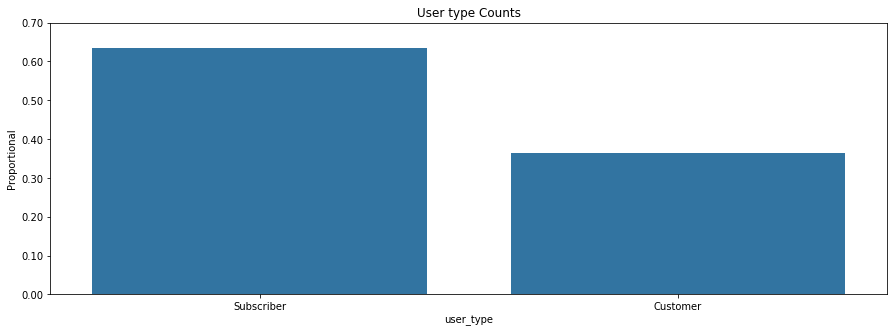

In [9]:
plt.subplots(figsize=(15,5));
sb.countplot(data=df, x='user_type', color=color_palt, order=order_ind);
plt.yticks(ticks_prop * df_size, ticks_name);
plt.ylabel('Proportional');
plt.title('User type Counts');
max_prop

It's observed that the total number of subscirbers are greater that the costumer numbers

16.25516535169412

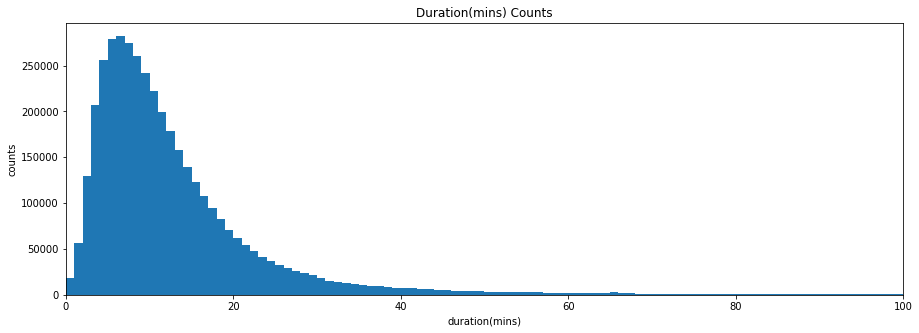

In [10]:
plt.subplots(figsize=(15,5));

bins_val = np.arange( df['duration_min'].min(), df['duration_min'].max() + 1, 1)

plt.hist(data=df, x='duration_min', color=color_palt, bins=bins_val);
plt.title('Duration(mins) Counts');
plt.xlim([0, 100]);
plt.xlabel("duration(mins)");
plt.ylabel("counts");

df['duration_min'].mean()

The average duration is around 16.25 mins.
The normal distribution is skewed to right, since most of the durations below 20 mins.
Small proportional of the rides have a duration above 40 mins.

In [11]:
color_palt = sb.color_palette()[0]
order_val = df['year'].value_counts()

order_ind = order_val.index
max_prop = order_val[2019]/df_size

ticks_prop = np.arange(0, max_prop + 0.1, 0.1)
ticks_name = ['{:0.2f}'.format(v) for v in ticks_prop]

0.6225280184192876

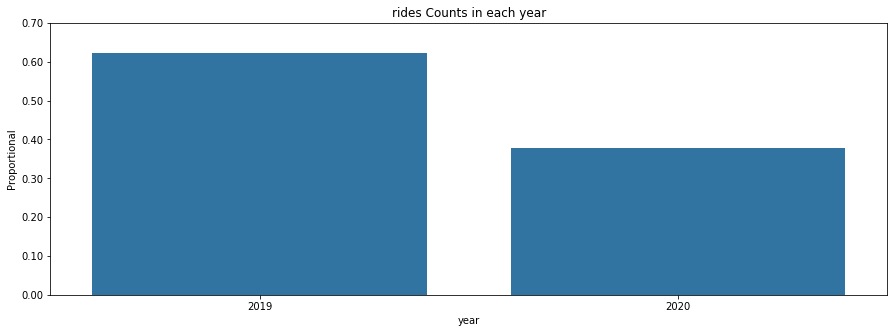

In [12]:
plt.subplots(figsize=(15,5));
sb.countplot(data=df, x='year', color=color_palt, order=order_ind);
plt.title('rides Counts in each year');
plt.yticks(ticks_prop * df_size, ticks_name);
plt.ylabel('Proportional');
max_prop

Number of rides in 2019 is greater than that in 2020, however we should consider that only we took 8 months from 2020 and not the whole year records.

In [13]:
color_palt = sb.color_palette()[0]
order_val = df['month'].value_counts()

order_ind = order_val.index
max_prop = order_val[2]/df_size

ticks_prop = np.arange(0, max_prop + 0.1, 0.1)
ticks_name = ['{:0.2f}'.format(v) for v in ticks_prop]

0.10374705462986485

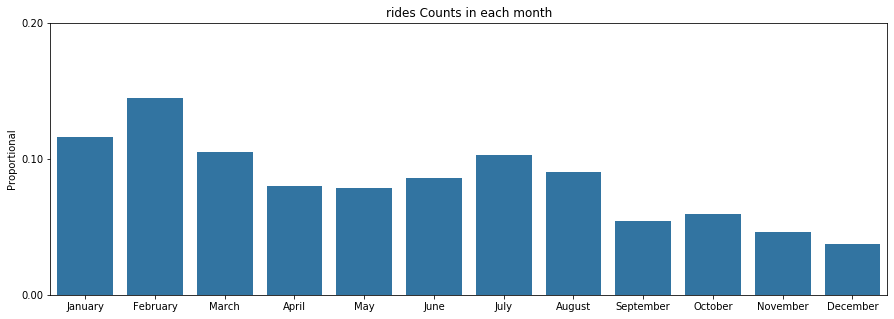

In [29]:
order_val = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


plt.subplots(figsize=(15,5));
sb.countplot(data=df, x='month', color=color_palt);
plt.title('rides Counts in each month');
plt.xticks(np.arange(0,12,1), order_val);
plt.yticks(ticks_prop * df_size, ticks_name);
plt.ylabel('Proportional');
plt.xlabel('');
max_prop

It's observed that February has the most rides with a protion on 0.1 of the total rides. Please note that the last 4 months records only the data of 2019.

In [15]:
color_palt = sb.color_palette()[0]
order_val = df['day'].value_counts()

order_ind = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
max_prop = order_val[0]/df_size

ticks_prop = np.arange(0, max_prop + 0.1, 0.1)
ticks_name = ['{:0.2f}'.format(v) for v in ticks_prop]

0.17170120407252595

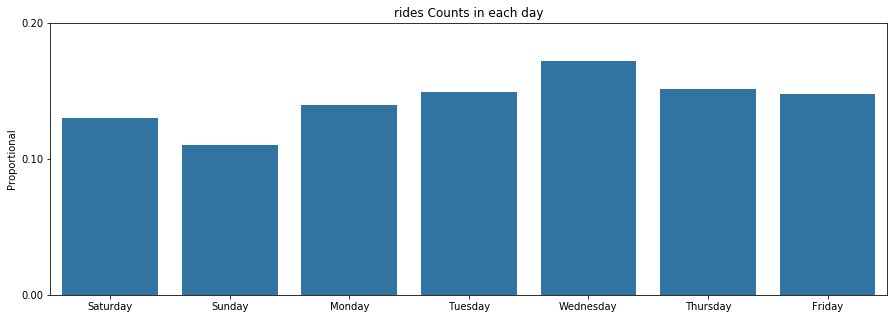

In [16]:
plt.subplots(figsize=(15,5));
sb.countplot(data=df, x='day', color=color_palt, order=order_ind);
plt.title('rides Counts in each day');
plt.yticks(ticks_prop * df_size, ticks_name);
plt.ylabel('Proportional');
plt.xlabel('');
max_prop

Weekdays have more rides than weekends. Wednesday has the greatest protion of the rides.

In [17]:
color_palt = sb.color_palette()[0]
order_val = df['hour'].value_counts()

order_ind = order_val.index
max_prop = order_val[order_ind[0]]/df_size

ticks_prop = np.arange(0, max_prop + 0.1, 0.1)
ticks_name = ['{:0.2f}'.format(v) for v in ticks_prop]

0.10374705462986485

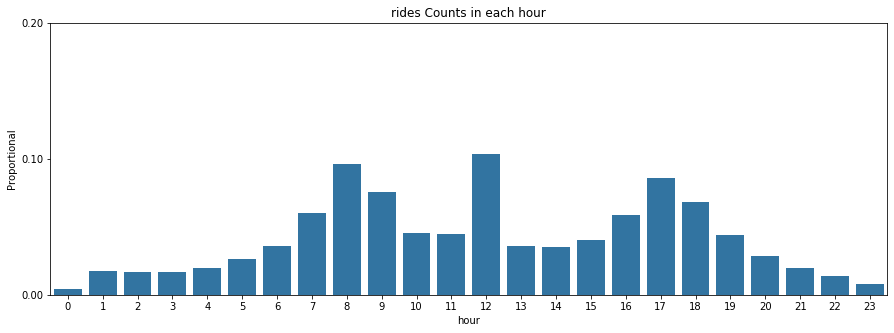

In [18]:

plt.subplots(figsize=(15,5));
sb.countplot(data=df, x='hour', color=color_palt);
plt.title('rides Counts in each hour');
plt.yticks(ticks_prop * df_size, ticks_name);
plt.ylabel('Proportional');
max_prop

The distribution is almost a bi normal distribution. the rides starts around 8 am, 12 pm, and 5 pm

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are some outliers in the duration in mins, I think that's because some rides keep the bike with them over night and return them the following day. No need to transformations, the data is well distributed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I changed the started_at and ended_at strings to be timesamp to extract the starting hour, day, month and year, and to find the duration of each ride.
Moreover, I added two new columns for days in number and user type in numbers, that represents these categorical data in numbers to use them in different kinds of plot.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

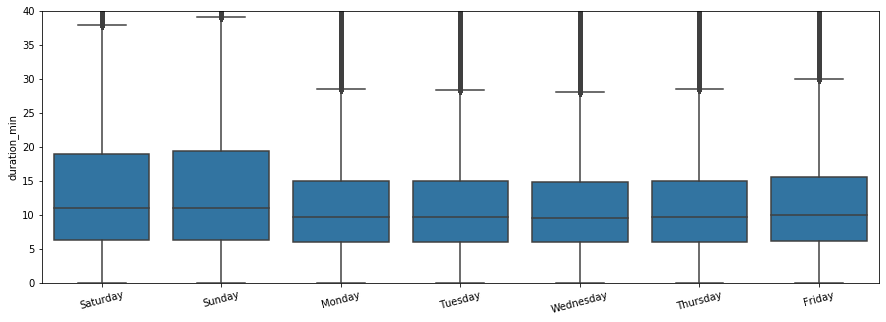

In [19]:
plt.subplots(figsize=(15,5));
order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sb.boxplot(data = df, x='day', y='duration_min', color=color_palt, order=order_val);
plt.xticks(rotation = 15);
plt.xlabel('');
plt.ylim([0, 40]);

Weekends seems to have duration range from 5 to 15 mins and duration average around 10 mins. weekends seems to have duration range from 6 to 19 mins and duration average around 11 mins. It's observed that there are lots of outliers, but that is because the large sample number.

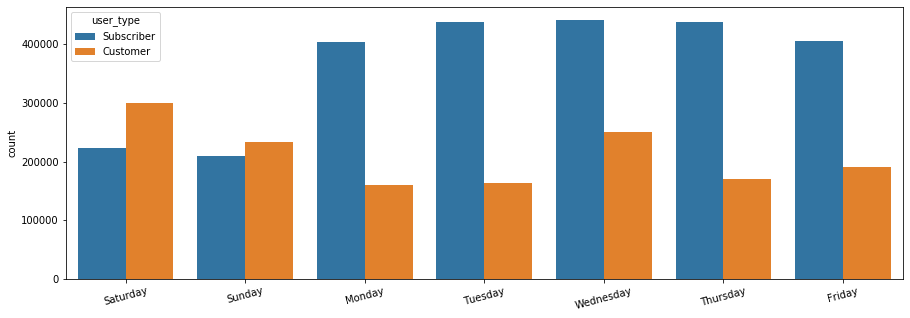

In [20]:
plt.subplots(figsize=(15,5));
order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
fig = sb.countplot(data=df, x='day', hue='user_type', order=order_val);
plt.xlabel('');
plt.xticks(rotation = 15);

Subscribers number is greater that customer in weekdays, however the customers number is greater than that for subscribers in weekdays.

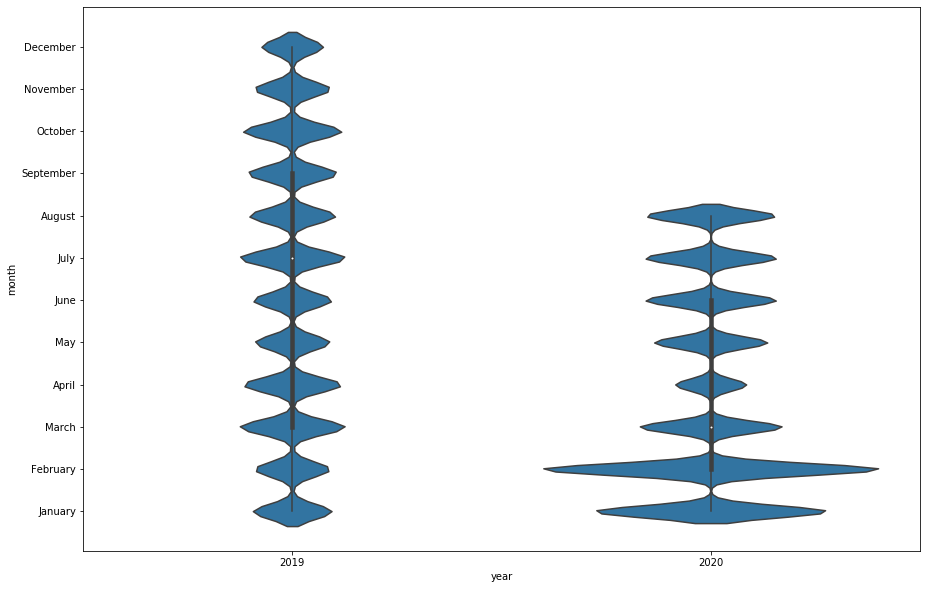

In [21]:
order_val = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']

plt.subplots(figsize=(15,10));
sb.violinplot(data = df, x='year', y='month', color=color_palt);
plt.yticks(np.arange(1,13,1) , order_val);

In 2019: Number of rides per month is alomst stable. It slightly increases in March, April, July and October.

In 2020: The rides increased dramatically on January and Februray which considered the Covid-19 start period. Starts to decrease in March, and April due to the quarantine. Then back to normal in May when the quarantine ends in most of the countries.

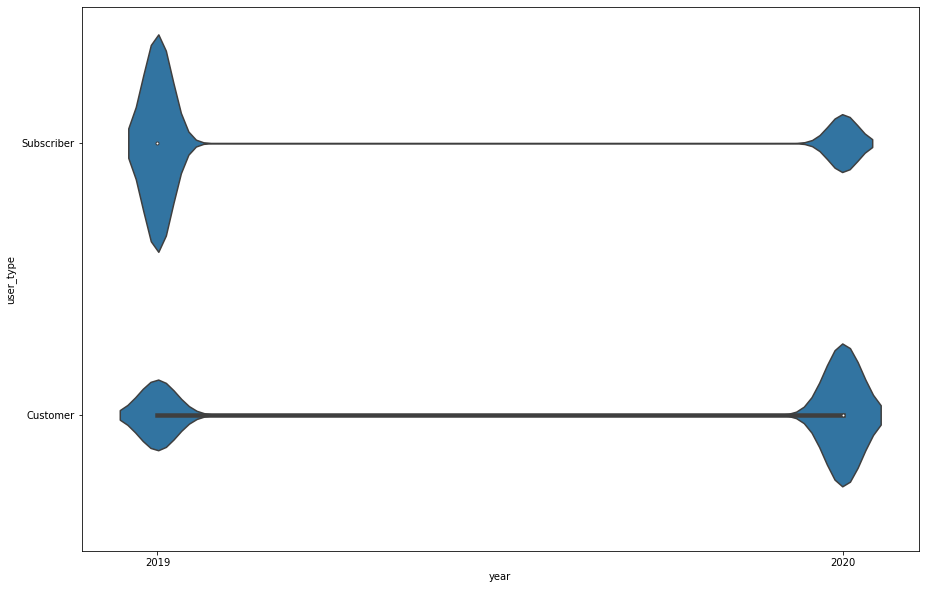

In [27]:
plt.subplots(figsize=(15,10));
sb.violinplot(data = df, y='user_type', x='year', color=color_palt);
plt.xticks([2019, 2020] , ['2019', '2020']);

Subscriers are away more in 2019 than in 2020. Customers are more in 2020 than in 2019. That makes sense, since during covid-19 in 2020 almost all embloyes starts to work from home, so no need to subscribe to get a bike ride on a regular basis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1- Subscriers are away more in 2019 than in 2020. Customers are more in 2020 than in 2019. That makes sense, since during covid-19 in 2020 almost all embloyes starts to work from home, so no need to subscribe to get a bike ride on a regular basis.

> 2- In 2020: The rides increased dramatically on January and Februray which considered the Covid-19 start period. Starts to decrease in March, and April due to the quarantine. Then back to normal in May when the quarantine ends in most of the countries.

> 3- Subscribers number is greater that customer in weekdays, however the customers number is greater than that for subscribers in weekdays.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, All other features out of interest are not significant to the analysis.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [16]:
df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]

C:\Users\Mah\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


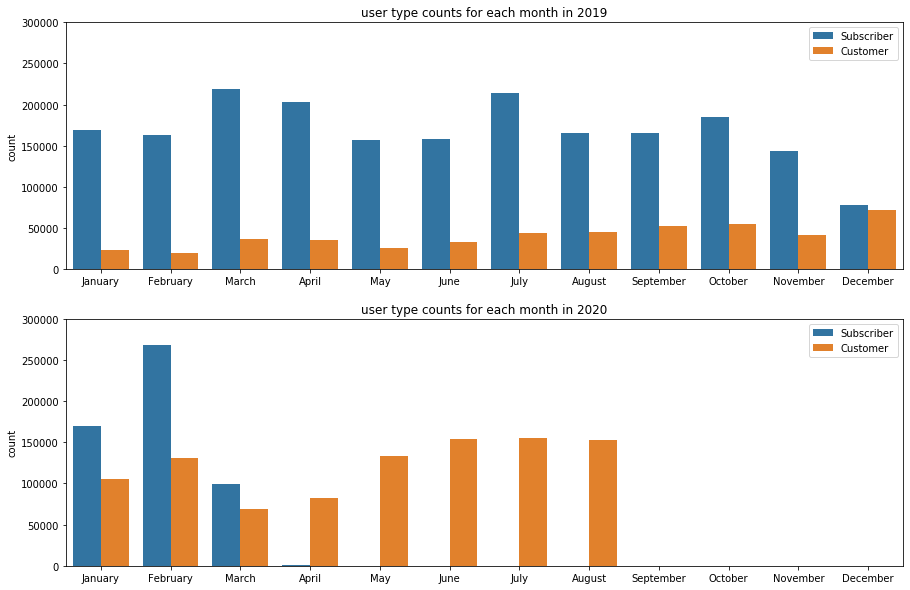

In [10]:
fig, ax = plt.subplots(nrows = 2, figsize = [15,10])
order_val = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']

sb.countplot(data=df_2019, x='month', hue='user_type', hue_order = ['Subscriber', 'Customer'], ax=ax[0], order=np.arange(1,13,1));
ax[0].set_title('user type counts for each month in 2019');
ax[0].set_xticklabels(order_val);
ax[0].legend(loc='upper right');
ax[0].set_xlabel('');
ax[0].set_ylim([0, 300000]);


sb.countplot(data=df_2020, x='month', hue='user_type', hue_order = ['Subscriber', 'Customer'], ax=ax[1],  order=np.arange(1,13,1));
ax[1].set_title('user type counts for each month in 2020');
ax[1].set_xticklabels(order_val);
ax[1].legend(loc='upper right');
ax[1].set_xlabel('');
ax[1].set_ylim([0, 300000]);

fig.show();


In 2019: Subscribers are more than Customers in all months.

In 2020: The Subsciber rides increased dramatically on January and Februray which considered the Covid-19 start period. Starts to decrease in March, and almost no Subscribers ride starting from April due to the quarantine.

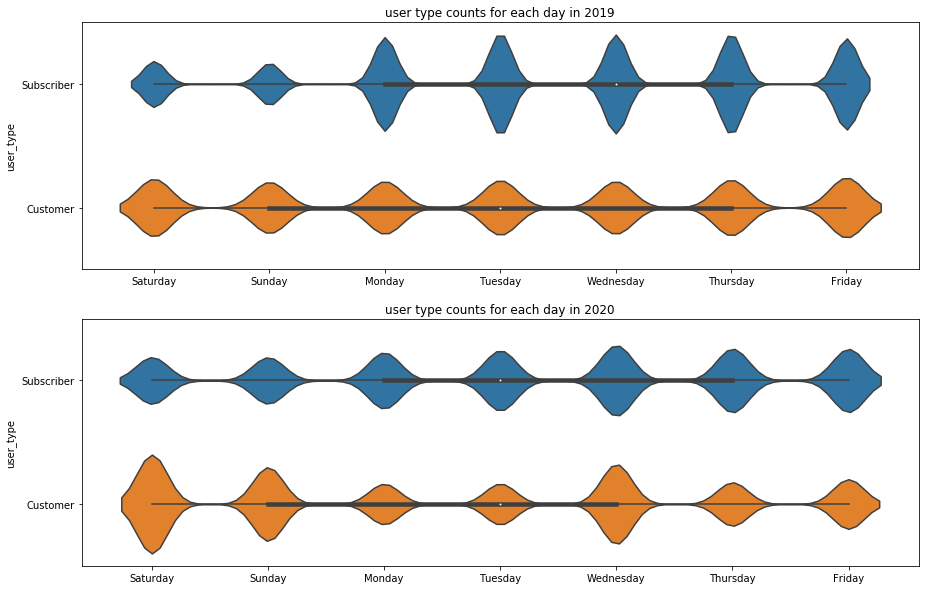

In [54]:
fig, ax = plt.subplots(nrows = 2, figsize = [15,10]);
order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

sb.violinplot(data = df_2019, y='user_type', x='day_num', ax=ax[0] );
ax[0].set_title('user type counts for each day in 2019');
ax[0].set_xlabel('');
ax[0].set_xticks(np.arange(0,7,1));
ax[0].set_xticklabels(order_val);


sb.violinplot(data = df_2020, y='user_type', x='day_num', ax=ax[1], order =['Subscriber', 'Customer']);
ax[1].set_title('user type counts for each day in 2020');
ax[1].set_xlabel('');
ax[1].set_xticks(np.arange(0,7,1));
ax[1].set_xticklabels(order_val);


In 2019 Subscribers are more in weekdays than Customers, and Customers are more in weekends.

In 2020 Subscribers are more in weekdays than Customers, and Customers are more in weekends. Except for Wednesday, Customers are more than Subscribers.

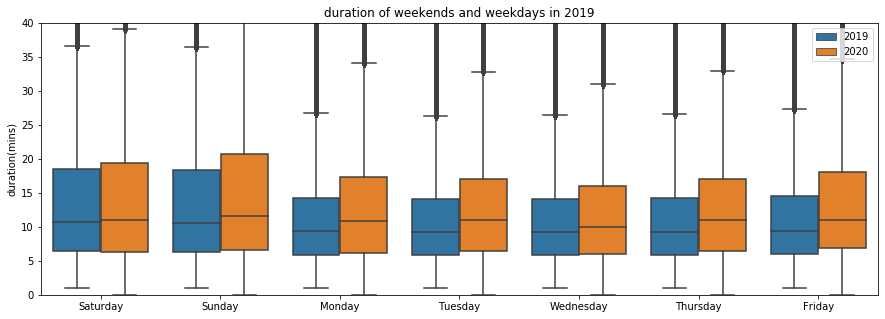

In [42]:
order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

fig= plt.subplots(figsize = [15,5])

sb.boxplot(data = df, x='day', y='duration_min', hue='year', order=order_val);
plt.title('duration of weekends and weekdays in 2019');
plt.ylabel('duration(mins)');
plt.ylim([0, 40]);
plt.xlabel('');
plt.legend(loc='upper right');

The average duration in min for all days of 2020 are greater that in 2019. The range and the average of duration in weekends are greater than that in weekdays in both 2019 and 2020.

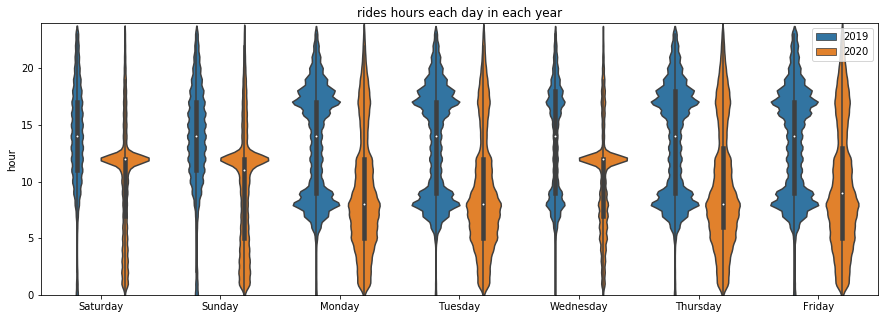

In [40]:
order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

fig= plt.subplots(figsize = [15,5])

sb.violinplot(data=df, x='day', y='hour', order=order_val, hue='year');
plt.title('rides hours each day in each year');
#plt.ylabel('duration(mins)');
plt.ylim([0, 24]);
plt.xlabel('');
plt.legend(loc='upper right');

In 2019, on average the rides on weekdays starts at 7-8 am and 5 pm which is the start and end hours of the employees. 
At weekend, the rides starts from around 7 to 12 am with a normal distrubtuion with a mean around 2 pm

In 2020, the rides start on average at 12pm on weekends. The rides start on average on 7-8 am and smaller portion starts at 5 pm at weekdays. Except for Wednesdays, it's much like the weekends which the rides start on average at 12pm.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1- In 2020: The Subsciber rides increased dramatically on January and Februray which considered the Covid-19 start period. Starts to decrease in March, and almost no Subscribers ride starting from April due to the quarantine.

>2- In 2020 Subscribers are more in weekdays than Customers, and Customers are more in weekends. Except for Wednesday, Customers are more than Subscribers.

>3- The average duration in min for all days of 2020 are greater that in 2019. The range and the average of duration in weekends are greater than that in weekdays in both 2019 and 2020.

>4 In 2020, the rides start on average at 12pm on weekends. The rides start on average on 7-8 am and smaller portion starts at 5 pm at weekdays. Except for Wednesdays, it's much like the weekends which the rides start on average at 12pm.

### Were there any interesting or surprising interactions between features?

> Yes, the interaction between duration, starting hour, year and starting day shows that the behaviour of rides on Wednesdays is more like that observed in weekends that that observed in weekdays in 2020. This observation is a little bit surprising, since Wednesday is considered a working day. May be during Covid-19 period, most of working organizations decide to give Wednesday a vacation and to only work 4 days per week to decrease the load on the emloyees during the covid period. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!